Looking at oscillation index for 2015 at Deep Bay

In [91]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline
import glob
from salishsea_tools import (nc_tools, geo_tools, tidetools) 
import netCDF4 as nc
import numpy.ma as ma

In [2]:
Jan = sorted(glob.glob('/results/SalishSea/hindcast/*jan15/*1h*grid_T*'))
Feb = sorted(glob.glob('/results/SalishSea/hindcast/*feb15/*1h*grid_T*'))
Mar = sorted(glob.glob('/results/SalishSea/hindcast/*mar15/*1h*grid_T*'))
Apr = sorted(glob.glob('/results/SalishSea/hindcast/*apr15/*1h*grid_T*'))
May = sorted(glob.glob('/results/SalishSea/hindcast/*may15/*1h*grid_T*'))
Jun = sorted(glob.glob('/results/SalishSea/hindcast/*jun15/*1h*grid_T*'))
Jul = sorted(glob.glob('/results/SalishSea/hindcast/*jul15/*1h*grid_T*'))
Aug = sorted(glob.glob('/results/SalishSea/hindcast/*aug15/*1h*grid_T*'))
Sep = sorted(glob.glob('/results/SalishSea/hindcast/*sep15/*1h*grid_T*'))
Oct = sorted(glob.glob('/results/SalishSea/hindcast/*oct15/*1h*grid_T*'))
Nov = sorted(glob.glob('/results/SalishSea/hindcast/*nov15/*1h*grid_T*'))
Dec = sorted(glob.glob('/results/SalishSea/hindcast/*dec15/*1h*grid_T*'))

# Index for January

In [119]:
start_time=0
end_time= -1
depth=0
lon=558
lat=155

with nc_tools.scDataset(Jan) as f:
        t = f.variables['votemper'][start_time:end_time,depth,lon,lat]
        s = f.variables['vosaline'][start_time:end_time,depth,lon,lat]
        ssh = f.variables['sossheig'][start_time:end_time,lon,lat]
        lows_and_highs = []
        start_point = 0
        interval = 9
        target = 'low'
        while (start_point) < (ssh.shape[0]-1):
            if target == 'low':
                low = np.argmin(ssh[start_point:start_point + interval])
                lows_and_highs.append(low + start_point)
                start_point = low + start_point 
                target = 'high'
            elif target == 'high':
                high = np.argmax(ssh[start_point:start_point + interval])
                lows_and_highs.append(high + start_point)
                start_point = high + start_point 
                target = 'low'

In [120]:
list_of_index = ma.masked_array(np.zeros([ssh.shape[0]]), True)
for n in range(len(lows_and_highs)-2):
    a = np.array([(s[lows_and_highs[n]],t[lows_and_highs[n]])])
    b = np.array([(s[lows_and_highs[n+1]],t[lows_and_highs[n+1]])])
    c = np.array([(s[lows_and_highs[n+2]],t[lows_and_highs[n+2]])])
    dist_ab = la.norm(b - a)
    dist_ac = la.norm(c - a)
    dist_bc = la.norm(c - b)
    OscIndex = dist_ab + dist_bc - dist_ac
    list_of_index[lows_and_highs[n+1]] = OscIndex
    list_of_index.mask[lows_and_highs[n+1]] = False

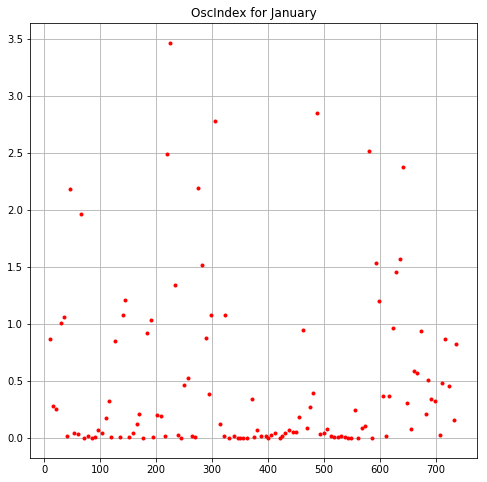

In [121]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
x = range(len(list_of_index))
ax.plot(list_of_index, 'r.')
ax.grid('on')
ax.set_title('OscIndex for January')

# 2015

In [115]:
start_time=0
end_time= -1
depth=6
lon=558
lat=155
year = Jan + Feb + Mar + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov + Dec

with nc_tools.scDataset(year) as f:
        t = f.variables['votemper'][start_time:end_time,depth,lon,lat]
        s = f.variables['vosaline'][start_time:end_time,depth,lon,lat]
        ssh = f.variables['sossheig'][start_time:end_time,lon,lat]
        lows_and_highs = []
        start_point = 0
        interval = 9
        target = 'low'
        while (start_point) < (ssh.shape[0]-1):
            if target == 'low':
                low = np.argmin(ssh[start_point:start_point + interval])
                lows_and_highs.append(low + start_point)
                start_point = low + start_point 
                target = 'high'
            elif target == 'high':
                high = np.argmax(ssh[start_point:start_point + interval])
                lows_and_highs.append(high + start_point)
                start_point = high + start_point 
                target = 'low'

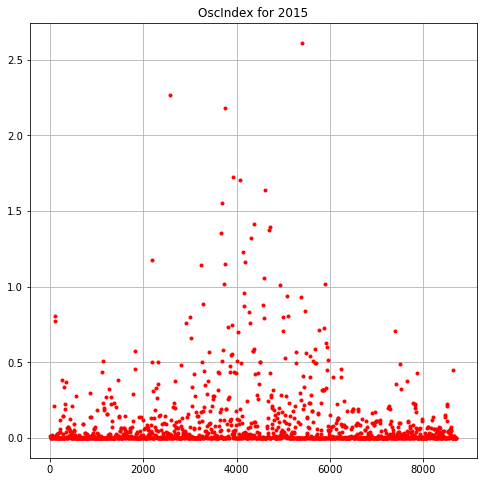

In [118]:
list_of_index = ma.masked_array(np.zeros([ssh.shape[0]]), True)
for n in range(len(lows_and_highs)-2):
    a = np.array([(s[lows_and_highs[n]],t[lows_and_highs[n]])])
    b = np.array([(s[lows_and_highs[n+1]],t[lows_and_highs[n+1]])])
    c = np.array([(s[lows_and_highs[n+2]],t[lows_and_highs[n+2]])])
    dist_ab = la.norm(b - a)
    dist_ac = la.norm(c - a)
    dist_bc = la.norm(c - b)
    OscIndex = dist_ab + dist_bc - dist_ac
    list_of_index[lows_and_highs[n+1]] = OscIndex
    list_of_index.mask[lows_and_highs[n+1]] = False

fig,ax = plt.subplots(1,1,figsize=(8,8))    
x = range(len(list_of_index))
ax.plot(list_of_index ,'r.')
ax.grid('on')
ax.set_title('OscIndex for 2015')